# Desafío Empresarial: Análisis de Cohortes para los Pagos de Ironhack (Proyecto 1)

##### Setup: cargar librerías necesarias

In [1936]:
# Importing the Warnings library for better presentation
import warnings

# Importing the NumPy library for numerical operations (as np)
import numpy as np
# Importing the Pandas library for data manipulation and analysis (as pd)
import pandas as pd

# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns
# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt

from IPython.display import display_html 

#####  Setup: ajustes de visualización para los gráficos

In [1937]:
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

warnings.resetwarnings()

In [1938]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

## Análisis Exploratorio de Datos (EDA)

### Carga inicial de datos

In [1939]:
cash_orig = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')

In [1940]:
fees_orig = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

### Visión general de datos

In [1941]:
cash_orig.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [1942]:
fees_orig.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [1943]:
cash_orig.shape # 23970 peticiones de cash

(23970, 16)

In [1944]:
fees_orig.shape # 21061 fees

(21061, 13)

In [1945]:
# Column names
print(f"Column Names: {cash_orig.columns}")
print(f"Column Names: {fees_orig.columns}")

Column Names: Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')
Column Names: Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')


### Variables de trabajo

In [1946]:
fees = fees_orig.copy()
cash = cash_orig.copy()

In [1947]:
# Renombrar 'id' a 'cash_request_id' para mayor claridad (y para el merge posterior con fees)
cash.rename(columns={'id': 'cash_request_id'}, inplace=True)

In [1948]:
#cash = cash[['cash_request_id', 'amount', 'status', 'created_at', 'user_id', 'deleted_account_id']]
cash.head()

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


### Unificación de ID de usuario

In [1949]:
# Ver NA en columna 'user_id'
cash[cash['user_id'].notna()].nunique() # 21867 válidos
cash[cash['user_id'].isna()].nunique() # 2103 Nan
# Comprobación: 21867 válidos + 2103 NaN = 23970 filas

# Comprobar que 'user_id' y 'deteled_account_id' son complementarios
cash[cash['user_id'].isna() & cash['deleted_account_id'].isna()] # Empty dataframe -> Siempre tenemos un valor válido en una de las dos columnas

# Comprobar solapamientos
cash[cash['user_id'].notna() & cash['deleted_account_id'].notna()] # La fila crid=280 tiene user_id=3161 y a la vez deleted_account_id=262

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7313,280,100.0,money_back,2019-12-21 16:01:38.756985+00,2020-11-04 12:55:32.000656+00,3161.0,2019-12-22 13:48:26+00,262.0,2020-01-16 23:00:00+00,2019-12-24,2020-11-23 10:31:54.598593+00,regular,NaN,completed,2020-03-20 14:12:53.160242+00,2020-03-31 16:05:16.427692+00


In [1950]:
# Nueva columna 'id_usuario' a partir de user_id + deleted_account_id
cash['id_usuario'] = cash['user_id'].fillna(cash['deleted_account_id'])
# Conversión de float a int
cash['id_usuario'] = cash['id_usuario'].astype(int)

### Tratamiento de fechas

In [1951]:
# Convertir 'created_at' a tipo datetime
print(cash['created_at'].dtypes)
cash['created_at'] = pd.to_datetime(cash['created_at'])
print(cash['created_at'].dtypes)

object
datetime64[ns, UTC]


### Obtener cohortes

In [1952]:
grouped1st = cash.pivot_table(
    values = "created_at",
    index = "id_usuario",
    aggfunc = "min"
)
warnings.filterwarnings('ignore', category=UserWarning)
grouped1st['cohorte'] = grouped1st['created_at'].dt.to_period('M') #UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
warnings.resetwarnings()
grouped1st.head()

,created_at,cohorte
id_usuario,,
34,2020-04-20 15:50:21.187257+00:00,2020-04
35,2019-12-13 20:27:38.106778+00:00,2019-12
47,2019-11-19 13:57:53.511561+00:00,2019-11
52,2019-12-17 09:01:12.584634+00:00,2019-12
53,2019-12-21 11:39:03.844436+00:00,2019-12


In [1953]:
# Dos maneras de calcular lo mismo:
grouped1st.index.shape # (11793,) usuarios distintos
grouped1st.value_counts().sum() # 11793 usuarios distintos

11793

In [1954]:
# Calcular valores más legibles para 'cohorte', sobre todo para que a la hora de graficar no se confundan con el eje temporal
# NB. Esta necesidad la hemos visto a posteriori...
claves = list(np.sort(grouped1st['cohorte'].unique()))
claves
valores = []
for index, value in enumerate(claves):
    #valores.append(f'COH-{index+1:02}.{value.strftime('%b')}/{str(value.year)}') 
    valores.append(f'COH-{index+1:02}.{value.strftime('%b')}/{str(value.strftime('%y'))}')     
valores
labels = dict(zip(claves, valores))
labels

{Period('2019-11', 'M'): 'COH-01.Nov/19',
 Period('2019-12', 'M'): 'COH-02.Dec/19',
 Period('2020-01', 'M'): 'COH-03.Jan/20',
 Period('2020-02', 'M'): 'COH-04.Feb/20',
 Period('2020-03', 'M'): 'COH-05.Mar/20',
 Period('2020-04', 'M'): 'COH-06.Apr/20',
 Period('2020-05', 'M'): 'COH-07.May/20',
 Period('2020-06', 'M'): 'COH-08.Jun/20',
 Period('2020-07', 'M'): 'COH-09.Jul/20',
 Period('2020-08', 'M'): 'COH-10.Aug/20',
 Period('2020-09', 'M'): 'COH-11.Sep/20',
 Period('2020-10', 'M'): 'COH-12.Oct/20',
 Period('2020-11', 'M'): 'COH-13.Nov/20'}

In [1955]:
# Añadir dato 'cohorte' a tabla de trabajo
cash_cohorts = pd.merge(cash, grouped1st[['cohorte']], on='id_usuario')
cash_cohorts.head()
# Añadir dato 'cohorte_lbl' a tabla de trabajo
cash_cohorts['cohorte_lbl'] = cash_cohorts['cohorte'].transform(lambda x: labels[x])
cash_cohorts.sample(30)

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario,cohorte,cohorte_lbl
10054,10814,100.0,money_back,2020-08-04 13:53:21.334192+00:00,2020-12-18 13:08:43.246984+00,19008.0,2020-08-04 14:53:45.200791+00,NaN,2020-08-30 22:00:00+00,2020-08-05,2020-08-30 22:00:00+00,regular,2020-08-11 13:53:21.33345+00,NaN,NaN,NaN,19008,2020-08,COH-10.Aug/20
19633,21532,100.0,money_back,2020-10-16 09:17:37.710593+00:00,2020-12-18 13:12:10.83925+00,74587.0,NaN,NaN,2020-11-05 22:00:00+00,2020-10-17,2020-11-05 15:24:28.846216+00,instant,2020-10-16 09:18:14.865875+00,NaN,NaN,NaN,74587,2020-10,COH-12.Oct/20
7354,17532,50.0,rejected,2020-09-23 18:50:46.358519+00:00,2020-09-24 07:41:32.032288+00,46619.0,2020-09-24 07:41:32.023886+00,NaN,2020-10-10 18:50:46.330244+00,NaN,NaN,instant,2020-09-30 18:50:46.330244+00,NaN,NaN,NaN,46619,2020-09,COH-11.Sep/20
13424,6861,100.0,money_back,2020-07-07 07:26:56.604135+00:00,2020-12-18 13:09:47.458106+00,3358.0,2020-07-07 09:32:26.843114+00,NaN,2020-08-01 22:00:00+00,2020-07-08,2020-07-30 00:19:55.546764+00,regular,NaN,NaN,NaN,NaN,3358,2020-02,COH-04.Feb/20
21496,25963,100.0,money_back,2020-10-29 08:27:30.035397+00:00,2020-12-18 13:12:57.717562+00,98301.0,NaN,NaN,2020-10-30 11:00:00+00,NaN,2020-10-30 19:43:08.140155+00,instant,2020-10-29 09:03:08.118684+00,NaN,NaN,NaN,98301,2020-10,COH-12.Oct/20
2950,7890,100.0,rejected,2020-07-14 01:27:26.251758+00:00,2020-07-14 12:25:46.122264+00,32731.0,2020-07-14 12:25:46.120027+00,NaN,2020-08-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,32731,2020-07,COH-09.Jul/20
3045,10036,50.0,rejected,2020-07-29 15:17:17.462506+00:00,2020-07-29 16:17:03.967628+00,27538.0,2020-07-29 16:17:03.96459+00,NaN,2020-08-05 22:00:00+00,NaN,NaN,instant,2020-08-05 15:17:17.462158+00,NaN,NaN,NaN,27538,2020-07,COH-09.Jul/20
21281,25678,50.0,money_back,2020-10-28 15:48:19.690383+00:00,2020-12-18 13:12:51.573338+00,20451.0,NaN,NaN,2020-11-12 15:48:11.078+00,NaN,2020-11-12 19:43:58.380936+00,regular,2020-11-04 15:48:19.686585+00,NaN,NaN,NaN,20451,2020-06,COH-08.Jun/20
14065,9006,100.0,money_back,2020-07-20 05:40:13.450115+00:00,2020-12-18 13:10:00.110519+00,3439.0,2020-07-20 12:54:19.656389+00,NaN,2020-08-05 22:00:00+00,2020-07-22,2020-08-05 22:00:00+00,regular,NaN,NaN,NaN,NaN,3439,2020-02,COH-04.Feb/20
9526,20598,100.0,direct_debit_rejected,2020-10-12 12:20:39.577826+00:00,2020-12-16 22:53:08.324719+00,61207.0,NaN,NaN,2020-12-04 23:00:00+00,2020-10-13,NaN,instant,2020-10-12 12:21:06.101649+00,pending,2020-12-16 22:53:08.35775+00,2020-12-16 22:53:08.357762+00,61207,2020-10,COH-12.Oct/20


In [1956]:
# Comprobar que la diferencia es sólo 2 columnas adicionales
print(cash.shape)
print(cash_cohorts.shape)

(23970, 17)
(23970, 19)


In [1957]:
cash_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   cash_request_id             23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [1958]:
# Convertir cohorte a tipo str para poder agrupar y graficar (el tipo de datos period[M] no lo permite)
cash_cohorts['cohorte'] = cash_cohorts['cohorte'].astype(str)
cash_cohorts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   cash_request_id             23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [1959]:
# Número de usuarios por cohorte
users_by_cohort = cash_cohorts.groupby('cohorte_lbl')['id_usuario'].nunique().reset_index()
users_by_cohort.rename(columns={'id_usuario': 'num_usuarios'}, inplace=True)
print(users_by_cohort)

      cohorte_lbl  num_usuarios
0   COH-01.Nov/19             1
1   COH-02.Dec/19           254
2   COH-03.Jan/20           106
3   COH-04.Feb/20            90
4   COH-05.Mar/20            86
5   COH-06.Apr/20           246
6   COH-07.May/20           432
7   COH-08.Jun/20          1540
8   COH-09.Jul/20          1482
9   COH-10.Aug/20           728
10  COH-11.Sep/20          1950
11  COH-12.Oct/20          4802
12  COH-13.Nov/20            76


In [1960]:
# Comprobación
print(cash['id_usuario'].nunique())
print(users_by_cohort['num_usuarios'].sum()) # 11793 total usuarios

11793
11793


In [1961]:
users_by_cohort.set_index('cohorte_lbl', inplace=True)
print(users_by_cohort.index)

Index(['COH-01.Nov/19', 'COH-02.Dec/19', 'COH-03.Jan/20', 'COH-04.Feb/20',
       'COH-05.Mar/20', 'COH-06.Apr/20', 'COH-07.May/20', 'COH-08.Jun/20',
       'COH-09.Jul/20', 'COH-10.Aug/20', 'COH-11.Sep/20', 'COH-12.Oct/20',
       'COH-13.Nov/20'],
      dtype='object', name='cohorte_lbl')


#### Gráfica

<Figure size 1000x600 with 0 Axes>

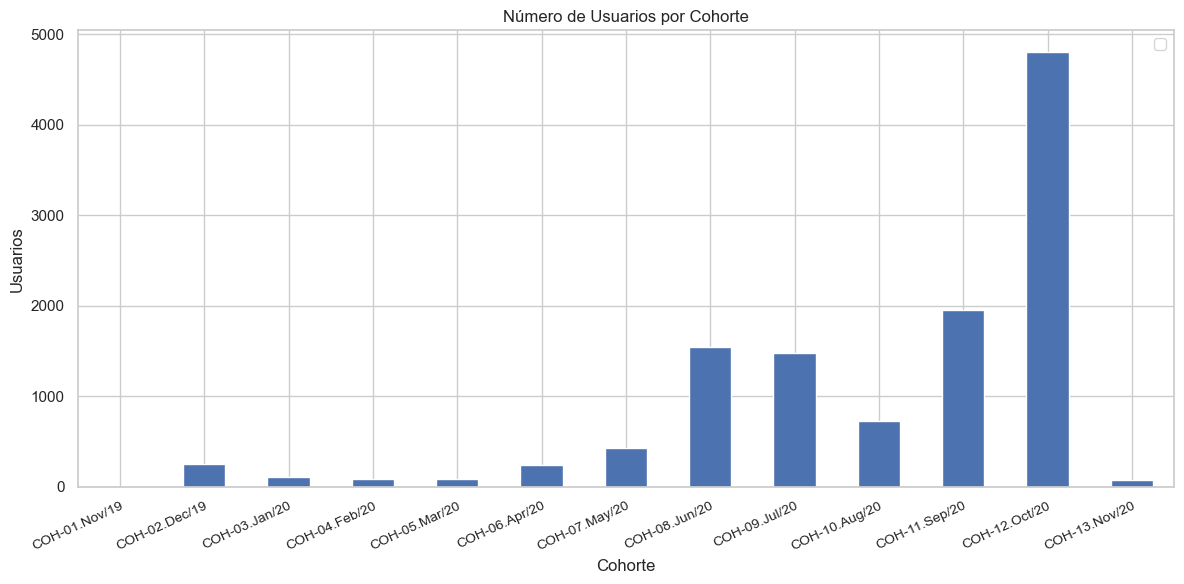

In [1962]:
# Gràfico de barras para visualizar el número de usuarios por cohorte
plt.figure(figsize=(10, 6))
#users_by_cohort.plot(kind='line', marker='o')
users_by_cohort.plot(kind='bar')
plt.title('Número de Usuarios por Cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Usuarios')
plt.grid(True)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor', fontsize=10)
plt.legend([])
plt.tight_layout()
plt.show()

#### CONCLUSIONES:

- Se observa un despunte muy significativo en el número de ususarios nuevos en octubre de 2020.

- Dicha observación nos genera las siguientes preguntas:

    - ¿Se ha realizado alguna actualización en el sistema para facilitar el alta de usuarios nuevos?
    - ¿Se ha realizado alguna campaña de márketing para promocionar el servicio?

## 1. Frecuencia de uso del servicio

### 1.1. Peticiones por cohorte

In [1963]:
# Número de peticiones de servicio por cohorte
requests_by_cohort = cash_cohorts.groupby('cohorte_lbl')['cash_request_id'].nunique().reset_index()
requests_by_cohort.rename(columns={'cash_request_id':'num_requests'}, inplace=True)
print(requests_by_cohort)

      cohorte_lbl  num_requests
0   COH-01.Nov/19             8
1   COH-02.Dec/19          1080
2   COH-03.Jan/20           354
3   COH-04.Feb/20           441
4   COH-05.Mar/20           371
5   COH-06.Apr/20           952
6   COH-07.May/20          1660
7   COH-08.Jun/20          5266
8   COH-09.Jul/20          4147
9   COH-10.Aug/20          1632
10  COH-11.Sep/20          2925
11  COH-12.Oct/20          5058
12  COH-13.Nov/20            76


In [1964]:
# Cambiar índice para poder graficar
requests_by_cohort.set_index('cohorte_lbl', inplace=True)
print(requests_by_cohort.index)

Index(['COH-01.Nov/19', 'COH-02.Dec/19', 'COH-03.Jan/20', 'COH-04.Feb/20',
       'COH-05.Mar/20', 'COH-06.Apr/20', 'COH-07.May/20', 'COH-08.Jun/20',
       'COH-09.Jul/20', 'COH-10.Aug/20', 'COH-11.Sep/20', 'COH-12.Oct/20',
       'COH-13.Nov/20'],
      dtype='object', name='cohorte_lbl')


In [1965]:
requests_by_cohort

,num_requests
cohorte_lbl,
COH-01.Nov/19,8
COH-02.Dec/19,1080
COH-03.Jan/20,354
COH-04.Feb/20,441
COH-05.Mar/20,371
COH-06.Apr/20,952
COH-07.May/20,1660
COH-08.Jun/20,5266
COH-09.Jul/20,4147


In [1966]:
# Comprobación
requests_by_cohort['num_requests'].sum() # 23970, coincide con el total de filas en la tabla

23970

#### Gráfica

<Figure size 1000x600 with 0 Axes>

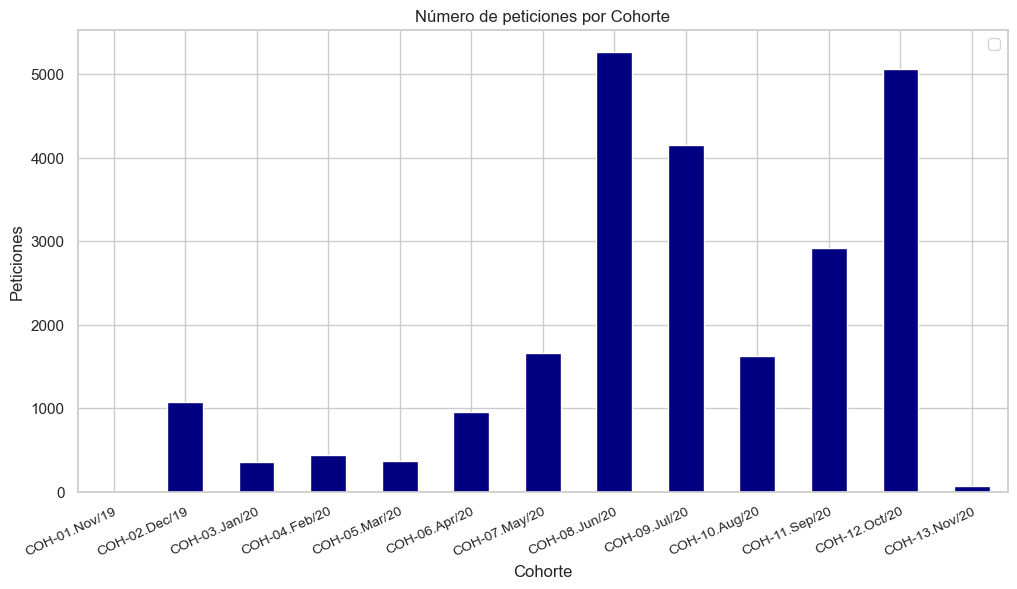

In [1967]:
# Crear un gráfico de barras para visualizar el número de requests por cohorte
plt.figure(figsize=(10, 6))
requests_by_cohort.plot(kind='bar', color='navy')
plt.title('Número de peticiones por Cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Peticiones')
plt.grid(True)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor', fontsize=10)
plt.legend([])
plt.show()

#### CONCLUSIONES:

- A pesar de que el cohorte COH-12.Oct/2020 es es que tiene mayor base de usuarios nuevos (como vimos en la gráfica anterior), vemos que en junio se han producido más solicitudes, lo que significa mayor rato de solicitudes por usuario.

- También se nota el efecto de las vacaciones en agosto, con menos solicitudes.

### 1.2. Frecuencia de uso

In [1968]:
# Añadir columna 'created_at_month' para determinar el mes de creación de cada petición
warnings.filterwarnings('ignore', category=UserWarning)
cash_cohorts['created_at_month'] = cash_cohorts['created_at'].dt.to_period('M')
warnings.resetwarnings()

subset = ['cash_request_id','created_at_month','cohorte_lbl','id_usuario']
cash_cohorts[subset]

,cash_request_id,created_at_month,cohorte_lbl,id_usuario
0,5,2019-12,COH-02.Dec/19,804
1,70,2019-12,COH-02.Dec/19,231
2,7,2019-12,COH-02.Dec/19,191
3,10,2019-12,COH-02.Dec/19,761
4,1594,2020-05,COH-07.May/20,7686
...,...,...,...,...
23965,20616,2020-10,COH-08.Jun/20,13681
23966,25243,2020-10,COH-12.Oct/20,30367
23967,22357,2020-10,COH-12.Oct/20,82122
23968,20256,2020-10,COH-12.Oct/20,64517


In [1969]:
# Frecuencia de uso del servicio por cohorte
frequency_by_cohort = cash_cohorts[subset].groupby(['created_at_month','cohorte_lbl'])['cash_request_id'].count().reset_index()
frequency_by_cohort.sort_values(by=['created_at_month','cohorte_lbl'])
frequency_by_cohort.set_index(['created_at_month','cohorte_lbl'], inplace=True)
frequency_by_cohort.rename(columns={'cash_request_id': 'num_requests'}, inplace=True)
frequency_by_cohort.iloc[0:50]

num_requests
created_at_month cohorte_lbl                
2019-11          COH-01.Nov/19             1
2019-12          COH-01.Nov/19             1
                 COH-02.Dec/19           288
2020-01          COH-02.Dec/19           106
                 COH-03.Jan/20           117
2020-02          COH-02.Dec/19            63
                 COH-03.Jan/20            24
                 COH-04.Feb/20            97
2020-03          COH-02.Dec/19            79
                 COH-03.Jan/20            17
                 COH-04.Feb/20            49
                 COH-05.Mar/20            99
2020-04          COH-01.Nov/19             1
                 COH-02.Dec/19            82
                 COH-03.Jan/20            35
                 COH-04.Feb/20            49
                 COH-05.Mar/20            42
                 COH-06.Apr/20           264
2020-05          COH-01.Nov/19             1
                 COH-02.Dec/19            86
                 COH-03.Jan/20            31
                 COH-04.Feb/20            45
                 COH-05.Mar/20            46
                 COH-06.Apr/20           150
                 COH-07.May/20           478
2020-06          COH-02.Dec/19            91
                 COH-03.Jan/20            29
                 COH-04.Feb/20            45
                 COH-05.Mar/20            47
                 COH-06.Apr/20           151
                 COH-07.May/20           318
                 COH-08.Jun/20          1934
2020-07          COH-02.Dec/19            72
                 COH-03.Jan/20            31
                 COH-04.Feb/20            45
                 COH-05.Mar/20            40
                 COH-06.Apr/20           116
                 COH-07.May/20           274
                 COH-08.Jun/20          1027
                 COH-09.Jul/20          1996
2020-08          COH-01.Nov/19             1
                 COH-02.Dec/19            84
                 COH-03.Jan/20            22
                 COH-04.Feb/20            44
                 COH-05.Mar/20            36
                 COH-06.Apr/20           107
                 COH-07.May/20           232
                 COH-08.Jun/20           957
                 COH-09.Jul/20           941
                 COH-10.Aug/20           993

In [1970]:
# Comprobación: la suma debe dar el número total de peticiones, o sea 23970
frequency_by_cohort['num_requests'].sum()

23970

In [1971]:
# Unstack multi-index para gráfico
requests_for_plot = frequency_by_cohort.unstack()

# Preparar leyenda para gráfico
legend_cohortes = [t[1] for t in requests_for_plot.columns]


#### Gráfica

<Figure size 1000x600 with 0 Axes>

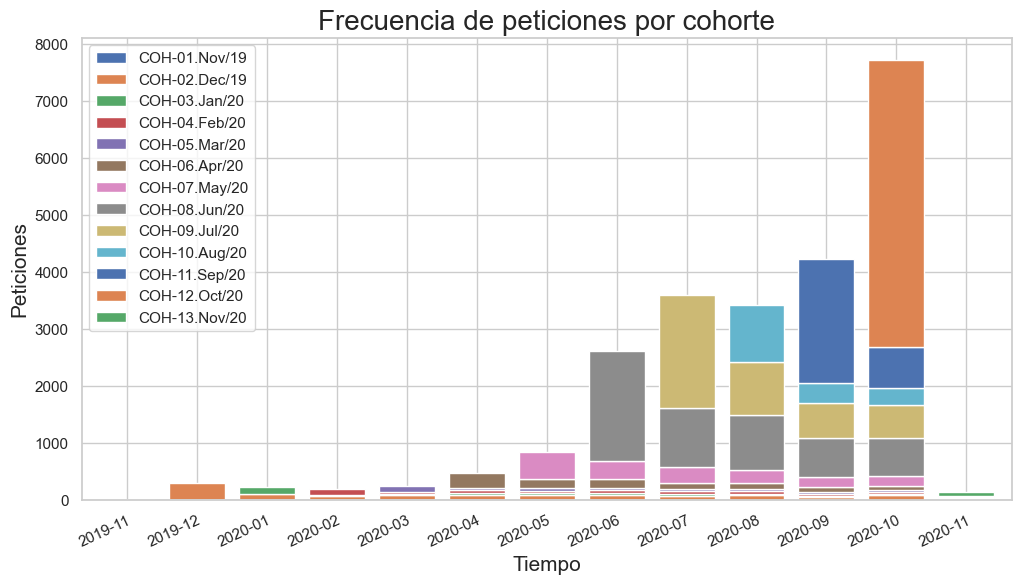

In [1972]:
# Crear gráfico!!!
plt.figure(figsize=(10, 6))
#requests_for_plot.plot(kind="line", marker="o")
#requests_for_plot.plot(kind="bar", width=1)
requests_for_plot.plot(kind="bar", stacked=True, width=0.8)
plt.title("Frecuencia de peticiones por cohorte", fontsize=20)
plt.xlabel("Tiempo", fontsize=15)
plt.ylabel("Peticiones", fontsize=15)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
plt.legend(legend_cohortes)
plt.show()

#### CONCLUSIONES:

- El tamaño de la cohorte es mayor cuanto más nueva es la cohorte (a exepción de agosto 2020, lo cual podría explicarse por el período vacacional). 

- Eso podría significar que el servicio está gustando a los usuarios y por tanto la base de usuarios es cada vez mayor. 

- Además, las cohortes más nuevas repiten en el uso del servicio, como se ve en la altura de cada una de las franjas de color (e.g. gris).

## 2. Tasa de incidentes

### Explorar tabla fees

In [1973]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [1974]:
fees.shape

(21061, 13)

In [1975]:
fees.info() # cash_request_id  21057 non-null  float64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [1976]:
fees[fees['cash_request_id'].isna()] # Hay 4 valores NaN en columna 'cash_request_id'!!!

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


In [1977]:
# Recuperar el valor de 'cash_request_id' a partir de 'reason', para esas 4 filas
valores_id = fees[fees['cash_request_id'].isna()]['id'] # 'id' = [2990,3124,5185,3590]
valores_id
fees[fees['id'].isin(valores_id)]

extract_crid = lambda x: float(x.split(" ")[-1])
crid_values = fees[fees['cash_request_id'].isna()]['reason'].transform(extract_crid)
crid_values

reason_dic = { 'cash_request_id' : crid_values}

fees.fillna(reason_dic, inplace=True)

# Comprobación
fees[fees['id'].isin(valores_id)]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,11164.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00,2020-11-04 16:01:17.296048+00,NaN,NaN,NaN,after
1960,3124,11444.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00,2020-11-04 16:01:08.332978+00,NaN,NaN,NaN,after
4605,5185,11788.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00,2020-11-04 16:01:36.492576+00,NaN,NaN,NaN,after
11870,3590,12212.0,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00,2020-11-04 16:01:53.106416+00,NaN,NaN,NaN,after


In [1978]:
# Conversión de float a int, para poder enlazarlo con la tabla cash
fees['cash_request_id'] = fees['cash_request_id'].astype(int)

In [1979]:
fees['type'].value_counts()

type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64

In [1980]:
cash['status'].value_counts()

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [1981]:
cash[cash['cash_request_id']==4410]

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario
11692,4410,100.0,money_back,2020-06-20 17:40:40.070040+00:00,2020-12-18 13:09:11.318129+00,NaN,2020-06-22 15:36:51.105835+00,7731.0,2020-07-30 22:00:00+00,2020-06-25,2020-08-28 13:24:55.619705+00,regular,NaN,completed,2020-08-06 22:27:53.590033+00,2020-08-28 13:24:55.635247+00,7731


In [1982]:
cash[cash['cash_request_id']==4410]

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario
11692,4410,100.0,money_back,2020-06-20 17:40:40.070040+00:00,2020-12-18 13:09:11.318129+00,NaN,2020-06-22 15:36:51.105835+00,7731.0,2020-07-30 22:00:00+00,2020-06-25,2020-08-28 13:24:55.619705+00,regular,NaN,completed,2020-08-06 22:27:53.590033+00,2020-08-28 13:24:55.635247+00,7731


In [1983]:
fees['cash_request_id'].value_counts().head(20) # Algunas fees corresponden al mismo cash_request_id
#fees[fees['cash_request_id']==12225].sort_values(by='created_at')
#fees[fees['cash_request_id']==5006].sort_values(by='created_at')
fees[fees['cash_request_id']==4410].sort_values(by='created_at')

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
16287,436,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.073333+00,2020-10-13 14:25:15.756663+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
16288,437,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.081331+00,2020-10-13 14:25:15.757952+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
16289,438,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.089237+00,2020-10-13 14:25:15.759127+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
16291,440,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.104567+00,2020-10-13 14:25:15.761493+00,NaN,2020-06-30 22:00:00+00,2020-07-27 22:00:00+00,after
16297,453,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-06-23 08:20:52.230431+00,2020-10-13 14:25:15.77132+00,NaN,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,after
1467,539,4410,postpone,accepted,NaN,5.0,Postpone Cash Request 4410,2020-06-23 20:51:56.356676+00,2020-10-13 14:25:01.302378+00,2020-06-23 20:52:01.070059+00,2020-06-30 22:00:00+00,2020-07-30 22:00:00+00,before
16575,1160,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-07-07 20:00:25.017765+00,2020-10-13 14:25:16.148192+00,NaN,2020-07-30 22:00:00+00,2020-08-29 22:00:00+00,after
16253,1194,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-07-08 13:27:17.138729+00,2020-10-13 14:25:15.701722+00,NaN,2020-07-30 22:00:00+00,2020-08-29 22:00:00+00,after
16659,1350,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-07-14 03:21:20.853017+00,2020-10-13 14:25:16.24635+00,NaN,2020-07-30 22:00:00+00,2020-08-29 22:00:00+00,after
15711,1378,4410,postpone,cancelled,NaN,5.0,Postpone Cash Request 4410,2020-07-15 00:24:09.36616+00,2020-10-13 14:25:14.852209+00,NaN,2020-07-30 22:00:00+00,2020-08-29 22:00:00+00,after


### Comprobar relación entre tablas cash y fees

In [1984]:
# Comprobar relación entre ambas tablas, que debería ser a través de la columna 'cash_request_id'
#fees[fees['cash_request_id']==1594] # Primeras cinco filas de cash: 5 70 7 10 1594
#fees[fees['cash_request_id'].isin([5,70,7,10,1594])]
#cash_cohorts['cash_request_id'].values[0:100]
#fees[fees['cash_request_id'].isin(cash_cohorts['cash_request_id'].values)].shape
cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)].shape # 11037 entradas en tabla cash NO tienen su correspondiente en la tabla fees, basándonos en 'cash_request_id'
cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)].sample(50)
#cash_cohorts[~cash_cohorts['cash_request_id'].isin(fees['cash_request_id'].values)]['status'].value_counts()

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario,cohorte,cohorte_lbl,created_at_month
1024,2477,100.0,rejected,2020-06-02 14:47:05.089374+00:00,2020-06-02 16:02:51.865274+00,10673.0,2020-06-02 16:02:51.861023+00,NaN,2020-07-02 14:47:15.054+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,10673,2020-06,COH-08.Jun/20,2020-06
4117,18883,100.0,rejected,2020-10-02 12:59:54.881586+00:00,2020-10-02 14:58:37.307689+00,12842.0,2020-10-02 14:58:37.3019+00,NaN,2020-11-04 22:00:00+00,NaN,NaN,regular,2020-10-09 12:59:54.841814+00,NaN,NaN,NaN,12842,2020-10,COH-12.Oct/20,2020-10
552,1134,100.0,money_back,2020-04-10 13:18:02.604018+00:00,2020-05-02 22:15:05.016049+00,960.0,2020-04-10 14:59:32.596124+00,NaN,2020-04-24 13:19:41.516+00,2020-04-13,2020-05-02 22:15:05.01487+00,regular,NaN,NaN,NaN,NaN,960,2019-12,COH-02.Dec/19,2020-04
7492,17818,100.0,rejected,2020-09-25 12:04:32.590244+00:00,2020-09-25 15:46:07.290662+00,49202.0,2020-09-25 15:46:07.281888+00,NaN,2020-10-16 22:00:00+00,NaN,NaN,instant,2020-10-02 12:04:32.548355+00,NaN,NaN,NaN,49202,2020-09,COH-11.Sep/20,2020-09
9367,9413,100.0,rejected,2020-07-22 13:52:54.624494+00:00,2020-07-22 14:27:23.849738+00,NaN,2020-07-22 14:27:23.84718+00,19304.0,2020-08-01 13:52:54.624+00,NaN,NaN,regular,2020-07-29 13:52:54.624134+00,NaN,NaN,NaN,19304,2020-07,COH-09.Jul/20,2020-07
9342,15695,100.0,rejected,2020-09-11 11:43:59.276134+00:00,2020-09-11 12:12:47.738989+00,NaN,2020-09-11 12:12:47.731091+00,19076.0,2020-10-06 22:00:00+00,NaN,NaN,regular,2020-09-18 11:43:59.237014+00,NaN,NaN,NaN,19076,2020-06,COH-08.Jun/20,2020-09
5064,13552,100.0,rejected,2020-08-22 07:02:49.043945+00:00,2020-08-22 14:40:10.071794+00,36286.0,2020-08-22 14:40:10.062789+00,NaN,2020-09-07 22:00:00+00,NaN,NaN,instant,2020-08-29 07:02:49.000567+00,NaN,NaN,NaN,36286,2020-08,COH-10.Aug/20,2020-08
7745,18412,50.0,rejected,2020-09-29 11:49:02.604462+00:00,2020-09-29 12:53:16.687621+00,NaN,2020-09-29 12:53:16.678995+00,8197.0,2020-11-04 22:00:00+00,NaN,NaN,instant,2020-10-06 11:49:02.561127+00,NaN,NaN,NaN,8197,2020-09,COH-11.Sep/20,2020-09
3295,11149,50.0,rejected,2020-08-06 13:18:35.997252+00:00,2020-08-06 14:08:30.858876+00,34588.0,2020-08-06 14:08:30.85646+00,NaN,2020-08-16 13:19:25.072+00,NaN,NaN,instant,2020-08-13 13:18:35.996908+00,NaN,NaN,NaN,34588,2020-08,COH-10.Aug/20,2020-08
951,1720,100.0,money_back,2020-05-13 09:30:05.318950+00:00,2020-06-17 17:29:07.734786+00,2630.0,2020-05-13 09:49:49.838764+00,NaN,2020-06-11 22:00:00+00,2020-05-14,2020-06-17 17:29:07.734536+00,regular,NaN,NaN,NaN,NaN,2630,2020-01,COH-03.Jan/20,2020-05


In [1985]:
fees[~fees['cash_request_id'].isin(cash_cohorts['cash_request_id'].values)].shape # 4 entradas en tabla fees NO tienen su correspondiente en la tabla cash
fees[~fees['cash_request_id'].isin(cash_cohorts['cash_request_id'].values)].head()
cash_cohorts[cash_cohorts['cash_request_id'].isin([11164, 11444, 11788, 12212])] # Confirmado, esas 4 entradas (para las que hemos repoblado 'cash_request_id') no están en la tabla cash

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario,cohorte,cohorte_lbl,created_at_month


In [1986]:
cash_cohorts.columns

Index(['cash_request_id', 'amount', 'status', 'created_at', 'updated_at',
       'user_id', 'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'id_usuario', 'cohorte', 'cohorte_lbl', 'created_at_month'],
      dtype='object')

In [1987]:
fees.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [1988]:
# Renombrar columnas para que no nos aparezcan _x o _y al hacer el merge
#fees.rename(columns={'id': 'fee_id', 'status': 'fee_status', 'created_at' : 'fee_created_at'}, inplace=True)

In [1989]:
# Seleccionar sólo columnas que interesan para la tasa de incidencias
#fees = fees[['fee_id', 'cash_request_id', 'type', 'fee_status', 'fee_created_at','total_amount']]

In [1990]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


### Unir tablas cash y fees

In [1991]:
print(cash_cohorts.shape)
print(fees.shape)

(23970, 20)
(21061, 13)


In [1992]:
# Añadir prefijo a columnas tabla fees
fees_prefixed = fees.add_prefix('fee_')

In [1993]:
#merged = pd.merge(cash_cohorts, fees_prefixed, left_on='cash_request_id', right_on='fee_cash_request_id') # 21057 (= todo cash - 4 filas)
merged = pd.merge(cash_cohorts, fees_prefixed, left_on='cash_request_id', right_on='fee_cash_request_id', how='outer') # 32098
print(merged.shape)
merged.head()

(32098, 33)


,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,fee_status,fee_category,fee_total_amount,fee_reason,fee_created_at,fee_updated_at,fee_paid_at,fee_from_date,fee_to_date,fee_charge_moment
0,3.0,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00,NaN,2019-12-09 14:58:28+00,1309.0,2019-12-16 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00,812.0,2019-12-11 09:40:33+00,NaN,2020-02-05 23:00:00+00,2019-12-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1994]:
merged.columns

Index(['cash_request_id', 'amount', 'status', 'created_at', 'updated_at',
       'user_id', 'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'id_usuario', 'cohorte', 'cohorte_lbl', 'created_at_month', 'fee_id',
       'fee_cash_request_id', 'fee_type', 'fee_status', 'fee_category',
       'fee_total_amount', 'fee_reason', 'fee_created_at', 'fee_updated_at',
       'fee_paid_at', 'fee_from_date', 'fee_to_date', 'fee_charge_moment'],
      dtype='object')

In [1995]:
subset_incidents = ['cash_request_id','created_at','transfer_type','status','recovery_status','fee_id','fee_created_at','fee_type','fee_status','fee_charge_moment']

In [1996]:
merged[merged['cash_request_id']==4410].loc[:, subset_incidents].sort_values(by='fee_created_at')

,cash_request_id,created_at,transfer_type,status,recovery_status,fee_id,fee_created_at,fee_type,fee_status,fee_charge_moment
4785,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,436.0,2020-06-23 08:20:52.073333+00,postpone,cancelled,after
4786,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,437.0,2020-06-23 08:20:52.081331+00,postpone,cancelled,after
4787,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,438.0,2020-06-23 08:20:52.089237+00,postpone,cancelled,after
4788,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,440.0,2020-06-23 08:20:52.104567+00,postpone,cancelled,after
4789,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,453.0,2020-06-23 08:20:52.230431+00,postpone,cancelled,after
4768,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,539.0,2020-06-23 20:51:56.356676+00,postpone,accepted,before
4790,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,1160.0,2020-07-07 20:00:25.017765+00,postpone,cancelled,after
4784,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,1194.0,2020-07-08 13:27:17.138729+00,postpone,cancelled,after
4791,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,1350.0,2020-07-14 03:21:20.853017+00,postpone,cancelled,after
4771,4410.0,2020-06-20 17:40:40.070040+00:00,regular,money_back,completed,1378.0,2020-07-15 00:24:09.36616+00,postpone,cancelled,after


In [1997]:
#merged[merged['recovery_status'].isna()].loc[:, subset_incidents].head(50)
incidents = merged[(merged['recovery_status'].notna()) & (merged['fee_type']=='incident')].groupby(['cohorte_lbl','fee_type'])['cash_request_id'].nunique().reset_index()
incidents.rename(columns = {'cash_request_id' : 'num_incidents'}, inplace=True)
print(incidents.head(50))

      cohorte_lbl  fee_type  num_incidents
0   COH-02.Dec/19  incident             34
1   COH-03.Jan/20  incident              9
2   COH-04.Feb/20  incident             15
3   COH-05.Mar/20  incident             22
4   COH-06.Apr/20  incident             69
5   COH-07.May/20  incident            156
6   COH-08.Jun/20  incident            542
7   COH-09.Jul/20  incident            405
8   COH-10.Aug/20  incident            127
9   COH-11.Sep/20  incident            195
10  COH-12.Oct/20  incident             23


In [1998]:
requests_by_cohort.head(50)

,num_requests
cohorte_lbl,
COH-01.Nov/19,8
COH-02.Dec/19,1080
COH-03.Jan/20,354
COH-04.Feb/20,441
COH-05.Mar/20,371
COH-06.Apr/20,952
COH-07.May/20,1660
COH-08.Jun/20,5266
COH-09.Jul/20,4147


In [1999]:

merged_incidents = pd.merge(requests_by_cohort, incidents, on='cohorte_lbl', how='outer')
print(merged_incidents.shape)
merged_incidents.head(20)


(13, 4)


,cohorte_lbl,num_requests,fee_type,num_incidents
0,COH-01.Nov/19,8,NaN,NaN
1,COH-02.Dec/19,1080,incident,34.0
2,COH-03.Jan/20,354,incident,9.0
3,COH-04.Feb/20,441,incident,15.0
4,COH-05.Mar/20,371,incident,22.0
5,COH-06.Apr/20,952,incident,69.0
6,COH-07.May/20,1660,incident,156.0
7,COH-08.Jun/20,5266,incident,542.0
8,COH-09.Jul/20,4147,incident,405.0
9,COH-10.Aug/20,1632,incident,127.0


In [2000]:
merged_incidents.fillna({'num_incidents': 0}, inplace=True)
merged_incidents['incident_rate'] = (merged_incidents['num_incidents'] / merged_incidents['num_requests']) * 100
merged_incidents.head(20)

,cohorte_lbl,num_requests,fee_type,num_incidents,incident_rate
0,COH-01.Nov/19,8,NaN,0.0,0.000000
1,COH-02.Dec/19,1080,incident,34.0,3.148148
2,COH-03.Jan/20,354,incident,9.0,2.542373
3,COH-04.Feb/20,441,incident,15.0,3.401361
4,COH-05.Mar/20,371,incident,22.0,5.929919
5,COH-06.Apr/20,952,incident,69.0,7.247899
6,COH-07.May/20,1660,incident,156.0,9.397590
7,COH-08.Jun/20,5266,incident,542.0,10.292442
8,COH-09.Jul/20,4147,incident,405.0,9.766096
9,COH-10.Aug/20,1632,incident,127.0,7.781863


### Gráfica

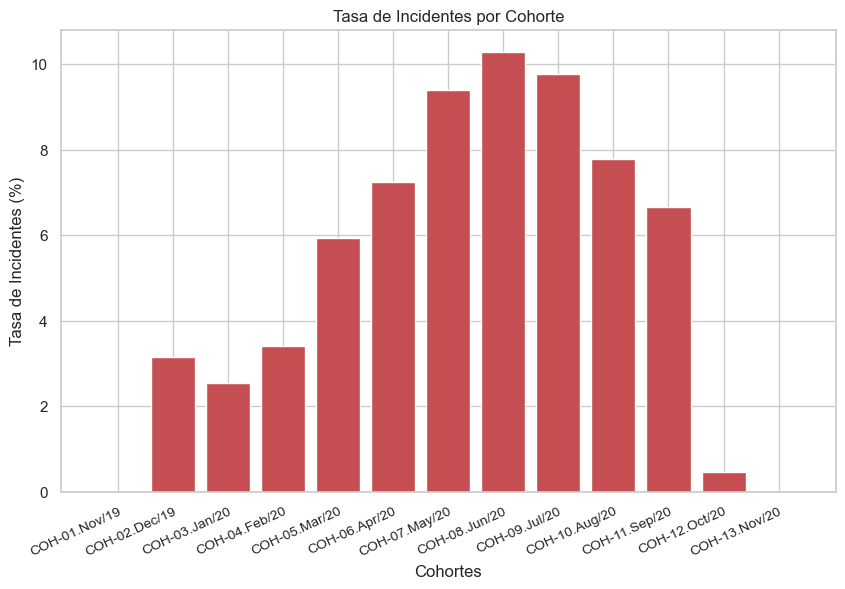

In [2001]:
# Graficar la tasa de incidentes por cohorte
plt.figure(figsize=(10, 6))
plt.bar(merged_incidents['cohorte_lbl'].astype(str), merged_incidents['incident_rate'], color='r')
plt.title('Tasa de Incidentes por Cohorte')
plt.xlabel('Cohortes')
plt.ylabel('Tasa de Incidentes (%)')
plt.xticks(rotation=25, ha='right', rotation_mode='anchor', fontsize=10)
plt.grid(True)
plt.show()

### CONCLUSIONES:

- Las cohortes que utilizaron el servicio por primera vez entre mayo y julio de 2020 son las que presentan mayor tasa de incidencias, alrededor del 10%.

- Las cohortes iniciales (hasta febrero de 2020) son las que presentan menor tasa de incidencias, lo que podría indicar un cierto perfil de usuario.

## 3. Ingresos generados por cohorte

### Exploración inicial

In [2002]:
# merged.head()
# merged.dtypes
fees.dtypes
# fees.sample(20)
# fees['status'].value_counts()
# fees['paid_at'].notna().count()

id                   int64
cash_request_id      int64
type                object
status              object
category            object
total_amount       float64
reason              object
created_at          object
updated_at          object
paid_at             object
from_date           object
to_date             object
charge_moment       object
dtype: object

### Tratamiento de fechas

In [2003]:
# Convertir 'created_at' a tipo datetime
print(merged['fee_paid_at'].dtypes)
merged['fee_paid_at'] = pd.to_datetime(merged['fee_paid_at'], format='mixed')
print(merged['fee_paid_at'].dtypes)

object
datetime64[ns, UTC]


### Determinar el mes de ingreso del fee

In [2004]:
# Añadir columna 'fee_paid_at_month' para determinar el mes de ingreso del fee
warnings.filterwarnings('ignore', category=UserWarning)
merged['fee_paid_at_month'] = merged['fee_paid_at'].dt.to_period('M')
warnings.resetwarnings()

# Convertir fee_paid_at_month a tipo str para poder agrupar y graficar (el tipo de datos period[M] no lo permite)
merged['fee_paid_at_month'] = merged['fee_paid_at_month'].astype(str)


### Criterio de filtrado

In [2005]:
# Tomar sólo fees con status 'accepted' y fecha paid_at <> NaN
ingresos = merged[(merged['fee_status']=='accepted') & (merged['fee_paid_at'].notna())]
ingresos.iloc[0:10, 16:-1]

subset_ingresos = ['cohorte','cohorte_lbl','fee_id','fee_paid_at_month','fee_total_amount',]
ingresos[subset_ingresos]

,cohorte,cohorte_lbl,fee_id,fee_paid_at_month,fee_total_amount
1481,2020-05,COH-07.May/20,928.0,2020-07,5.0
1495,2019-12,COH-02.Dec/19,1493.0,2020-08,5.0
1590,2020-04,COH-06.Apr/20,7533.0,2020-12,5.0
1591,2020-04,COH-06.Apr/20,13248.0,2020-12,5.0
1592,2020-04,COH-06.Apr/20,3923.0,2020-12,5.0
...,...,...,...,...,...
32091,2020-09,COH-11.Sep/20,21175.0,2020-11,5.0
32093,2020-09,COH-11.Sep/20,21181.0,2020-11,5.0
32094,2020-09,COH-11.Sep/20,21182.0,2020-11,5.0
32096,2020-11,COH-13.Nov/20,21183.0,2020-12,5.0


### 3.1. Cálculo de la métrica: Total de ingresos por cohorte

In [2006]:
total_by_cohort = ingresos[subset_ingresos].groupby(['cohorte_lbl'])['fee_total_amount'].sum().reset_index()
total_by_cohort.set_index('cohorte_lbl', inplace=True)
total_by_cohort.rename(columns={'fee_total_amount':'ingresos'}, inplace=True)
total_by_cohort

,ingresos
cohorte_lbl,
COH-01.Nov/19,30.0
COH-02.Dec/19,1055.0
COH-03.Jan/20,440.0
COH-04.Feb/20,595.0
COH-05.Mar/20,600.0
COH-06.Apr/20,1470.0
COH-07.May/20,3620.0
COH-08.Jun/20,13535.0
COH-09.Jul/20,11000.0


#### Gráfica

<Figure size 1000x600 with 0 Axes>

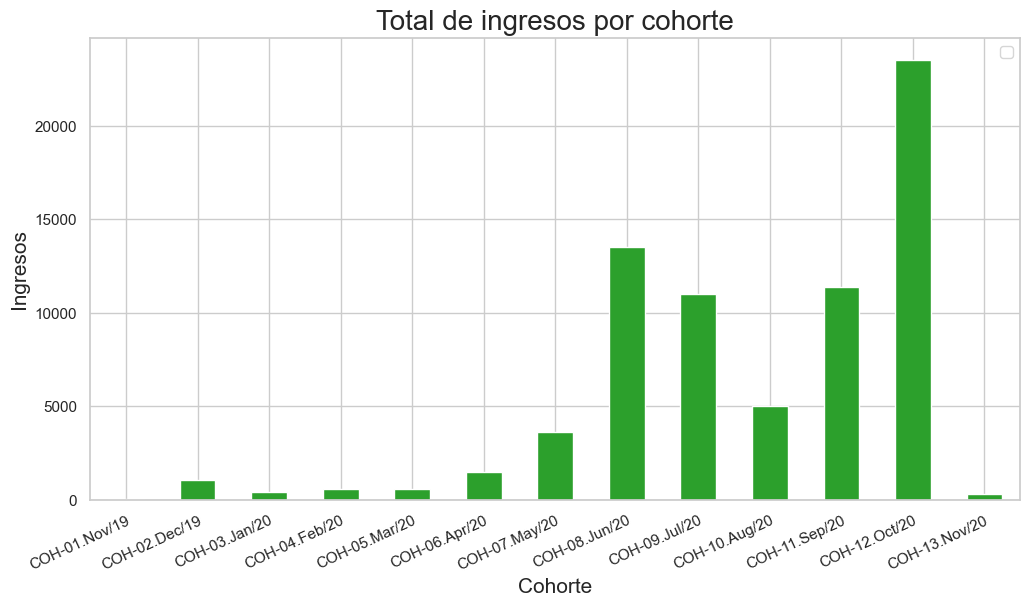

In [2007]:
# Gráfico total ingresos
plt.figure(figsize=(10, 6))
total_by_cohort.plot(kind="bar", color="tab:green")
plt.title("Total de ingresos por cohorte", fontsize=20)
plt.xlabel("Cohorte", fontsize=15)
plt.ylabel("Ingresos", fontsize=15)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
plt.legend([])
plt.show()

#### CONCLUSIONES:

- Los ingresos por cohorte aumentan significativamente a partir de junio 2020, lo cual tiene sentido puesto que era también el momento en que habíamos observado una mayor adopción del servicio.

- Destacan los ingresos de la cohorte de octubre 2020, pero como no disponemos de demasiados datos posteriores, no puede asegurarse que vaya a mantenerse en los meses posteriores o si es un pico puntual.

- Habría que buscar estrategias para estabilizar los ingresos y que no se produjeran picos abruptos sin continuidad, o valles. Una campaña de márketing veraniega podría incentivar el uso en agosto.

### 3.2. Cálculo de la métrica: Ingresos por cohorte en el tiempo

In [2008]:
# Ingresos por cohorte
ingresos_by_cohort = ingresos[subset_ingresos].groupby(['fee_paid_at_month','cohorte_lbl'])['fee_total_amount'].sum().reset_index()
ingresos_by_cohort.sort_values(by=['fee_paid_at_month','cohorte_lbl'])
ingresos_by_cohort.set_index(['fee_paid_at_month','cohorte_lbl'], inplace=True)
ingresos_by_cohort.rename(columns={'fee_total_amount': 'amount'}, inplace=True)
ingresos_by_cohort.iloc[0:50]

# ingresos_by_cohort = ingresos[subset_ingresos].groupby(['cohorte','fee_paid_at_month'])['fee_total_amount'].sum().reset_index()
# ingresos_by_cohort.sort_values(by=['cohorte','fee_paid_at_month'])
# ingresos_by_cohort.set_index(['cohorte','fee_paid_at_month'], inplace=True)
# ingresos_by_cohort.rename(columns={'fee_total_amount': 'amount'}, inplace=True)
# ingresos_by_cohort.iloc[0:20]

amount
fee_paid_at_month cohorte_lbl          
2020-06           COH-02.Dec/19    10.0
                  COH-03.Jan/20    10.0
                  COH-04.Feb/20    20.0
                  COH-05.Mar/20    20.0
                  COH-06.Apr/20    45.0
                  COH-07.May/20   115.0
                  COH-08.Jun/20   490.0
2020-07           COH-01.Nov/19     5.0
                  COH-02.Dec/19    60.0
                  COH-03.Jan/20    55.0
                  COH-04.Feb/20    30.0
                  COH-05.Mar/20    55.0
                  COH-06.Apr/20   160.0
                  COH-07.May/20   405.0
                  COH-08.Jun/20  1355.0
                  COH-09.Jul/20   770.0
2020-08           COH-02.Dec/19   135.0
                  COH-03.Jan/20    35.0
                  COH-04.Feb/20    45.0
                  COH-05.Mar/20    45.0
                  COH-06.Apr/20   140.0
                  COH-07.May/20   375.0
                  COH-08.Jun/20  1190.0
                  COH-09.Jul/20  1125.0
                  COH-10.Aug/20   340.0
2020-09           COH-01.Nov/19    10.0
                  COH-02.Dec/19   215.0
                  COH-03.Jan/20    90.0
                  COH-04.Feb/20   125.0
                  COH-05.Mar/20   105.0
                  COH-06.Apr/20   300.0
                  COH-07.May/20   740.0
                  COH-08.Jun/20  2860.0
                  COH-09.Jul/20  2540.0
                  COH-10.Aug/20  1420.0
                  COH-11.Sep/20   760.0
2020-10           COH-01.Nov/19    10.0
                  COH-02.Dec/19   300.0
                  COH-03.Jan/20   140.0
                  COH-04.Feb/20   200.0
                  COH-05.Mar/20   205.0
                  COH-06.Apr/20   440.0
                  COH-07.May/20  1025.0
                  COH-08.Jun/20  4010.0
                  COH-09.Jul/20  3425.0
                  COH-10.Aug/20  1710.0
                  COH-11.Sep/20  5155.0
                  COH-12.Oct/20  4010.0
2020-11           COH-01.Nov/19     5.0
                  COH-02.Dec/19   255.0

In [2009]:
# Iterar sobre las cohortes para calcular el total acumulado de ingresos
# for col in ingresos_by_cohort.columns:
#     if isinstance(col, tuple):
#         for col[0] in ingresos_by_cohort['cohorte']:
#             total_cohorte = ingresos_by_cohort[ingresos_by_cohort['cohorte'] == col[0]].groupby('fee_paid_at_month')['amount'].sum()
#             ingresos_by_cohort[ingresos_by_cohort['cohorte'] == col[0]]['total'] = total_cohorte
# ingresos_by_cohort['total_acumulado'] = 0
# ingresos_by_cohort.iloc[0:20]

In [2010]:
# Unstack multi-index para gráfico
ingresos_by_cohort = ingresos_by_cohort.unstack()
ingresos_by_cohort


amount                                            \
cohorte_lbl       COH-01.Nov/19 COH-02.Dec/19 COH-03.Jan/20 COH-04.Feb/20   
fee_paid_at_month                                                           
2020-06                     NaN          10.0          10.0          20.0   
2020-07                     5.0          60.0          55.0          30.0   
2020-08                     NaN         135.0          35.0          45.0   
2020-09                    10.0         215.0          90.0         125.0   
2020-10                    10.0         300.0         140.0         200.0   
2020-11                     5.0         255.0          70.0         165.0   
2020-12                     NaN          50.0          30.0           5.0   
2021-01                     NaN          30.0          10.0           NaN   
2021-02                     NaN           NaN           NaN           5.0   

                                                                           \
cohorte_lbl       COH-05.Mar/20 COH-06.Apr/20 COH-07.May/20 COH-08.Jun/20   
fee_paid_at_month                                                           
2020-06                    20.0          45.0         115.0         490.0   
2020-07                    55.0         160.0         405.0        1355.0   
2020-08                    45.0         140.0         375.0        1190.0   
2020-09                   105.0         300.0         740.0        2860.0   
2020-10                   205.0         440.0        1025.0        4010.0   
2020-11                   140.0         260.0         650.0        2580.0   
2020-12                    20.0         115.0         220.0         705.0   
2021-01                     5.0          10.0          70.0         240.0   
2021-02                     5.0           NaN          20.0         105.0   

                                                                           \
cohorte_lbl       COH-09.Jul/20 COH-10.Aug/20 COH-11.Sep/20 COH-12.Oct/20   
fee_paid_at_month                                                           
2020-06                     NaN           NaN           NaN           NaN   
2020-07                   770.0           NaN           NaN           NaN   
2020-08                  1125.0         340.0           NaN           NaN   
2020-09                  2540.0        1420.0         760.0           NaN   
2020-10                  3425.0        1710.0        5155.0        4010.0   
2020-11                  2300.0        1230.0        4250.0       15500.0   
2020-12                   510.0         210.0         865.0        3120.0   
2021-01                   190.0         100.0         240.0         615.0   
2021-02                   140.0          15.0         130.0         285.0   

                                 
cohorte_lbl       COH-13.Nov/20  
fee_paid_at_month                
2020-06                     NaN  
2020-07                     NaN  
2020-08                     NaN  
2020-09                     NaN  
2020-10                     NaN  
2020-11                   170.0  
2020-12                   125.0  
2021-01                    20.0  
2021-02                     5.0

In [2011]:

# Aplanar columnas
#ingresos_for_plot.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in ingresos_for_plot.columns]
ingresos_by_cohort.columns = [col[1] if isinstance(col, tuple) else col for col in ingresos_by_cohort.columns]
ingresos_by_cohort.fillna(0, inplace=True)
ingresos_by_cohort


,COH-01.Nov/19,COH-02.Dec/19,COH-03.Jan/20,COH-04.Feb/20,COH-05.Mar/20,COH-06.Apr/20,COH-07.May/20,COH-08.Jun/20,COH-09.Jul/20,COH-10.Aug/20,COH-11.Sep/20,COH-12.Oct/20,COH-13.Nov/20
fee_paid_at_month,,,,,,,,,,,,,
2020-06,0.0,10.0,10.0,20.0,20.0,45.0,115.0,490.0,0.0,0.0,0.0,0.0,0.0
2020-07,5.0,60.0,55.0,30.0,55.0,160.0,405.0,1355.0,770.0,0.0,0.0,0.0,0.0
2020-08,0.0,135.0,35.0,45.0,45.0,140.0,375.0,1190.0,1125.0,340.0,0.0,0.0,0.0
2020-09,10.0,215.0,90.0,125.0,105.0,300.0,740.0,2860.0,2540.0,1420.0,760.0,0.0,0.0
2020-10,10.0,300.0,140.0,200.0,205.0,440.0,1025.0,4010.0,3425.0,1710.0,5155.0,4010.0,0.0
2020-11,5.0,255.0,70.0,165.0,140.0,260.0,650.0,2580.0,2300.0,1230.0,4250.0,15500.0,170.0
2020-12,0.0,50.0,30.0,5.0,20.0,115.0,220.0,705.0,510.0,210.0,865.0,3120.0,125.0
2021-01,0.0,30.0,10.0,0.0,5.0,10.0,70.0,240.0,190.0,100.0,240.0,615.0,20.0
2021-02,0.0,0.0,0.0,5.0,5.0,0.0,20.0,105.0,140.0,15.0,130.0,285.0,5.0


#### Gráfica

<Figure size 1000x600 with 0 Axes>

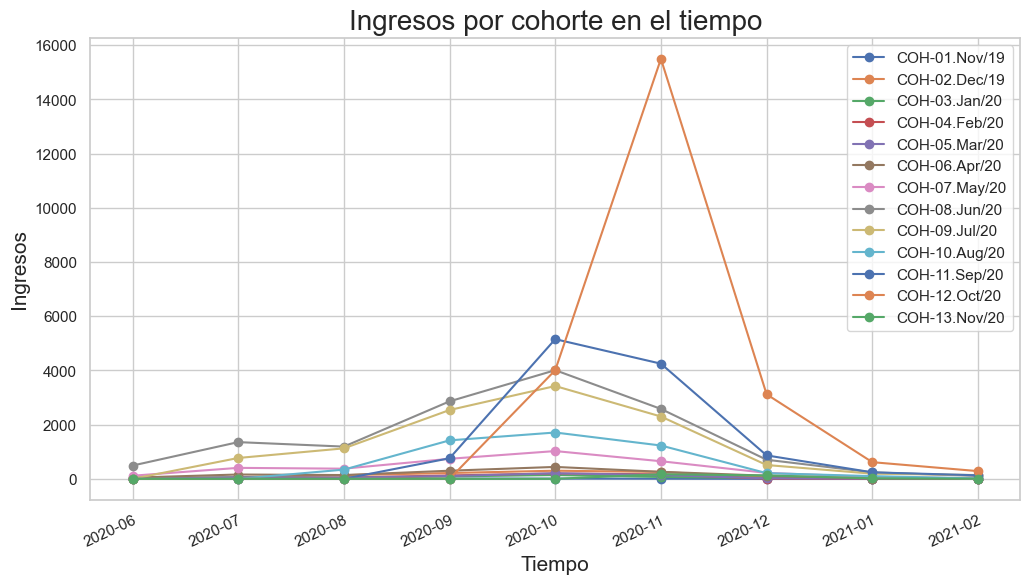

In [2012]:
# Crear gráfico!!!
plt.figure(figsize=(10, 6))
ingresos_by_cohort.plot(kind="line", marker="o")
plt.title("Ingresos por cohorte en el tiempo", fontsize=20)
plt.xlabel("Tiempo", fontsize=15)
plt.ylabel("Ingresos", fontsize=15)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
plt.legend(legend_cohortes)
plt.show()

#### CONCLUSIONES:

- Las cohortes a partir de mayo y hasta octubre inicialmente muestran ingresos ascendentes. Pero el ascenso no es sostenido y los ingresos descienden de nuevo. Esto podría significar una cierta estacionalidad en la demanda del servicio.

- La cohorte de octubre es la que genera ingresos más altos, con diferencia.

## 4. Métrica adicional

### Exploración inicial

In [2013]:
merged['amount'].value_counts()
merged['transfer_type'].value_counts()

transfer_type
instant    19488
regular    12606
Name: count, dtype: int64

### Criterio de filtrado

In [2014]:
# Quizá deberíamos filtrar las canceladas y/o rechazadas... pero de momento no filtramos nada
adelantos = merged
adelantos

# adelantos = merged[(merged['fee_status']=='accepted') & (merged['fee_paid_at'].notna())]
# adelantos.iloc[0:10, 16:-1]

subset_adelantos = ['cohorte','cohorte_lbl','amount','id_usuario','cash_request_id','transfer_type','fee_id']
adelantos[subset_adelantos]

,cohorte,cohorte_lbl,amount,id_usuario,cash_request_id,transfer_type,fee_id
0,2019-11,COH-01.Nov/19,1.0,47.0,3.0,regular,NaN
1,2019-12,COH-02.Dec/19,100.0,1309.0,4.0,regular,NaN
2,2019-12,COH-02.Dec/19,100.0,804.0,5.0,regular,NaN
3,2019-12,COH-02.Dec/19,100.0,812.0,6.0,regular,NaN
4,2019-12,COH-02.Dec/19,100.0,191.0,7.0,regular,NaN
...,...,...,...,...,...,...,...
32093,2020-09,COH-11.Sep/20,50.0,55916.0,27006.0,instant,21181.0
32094,2020-09,COH-11.Sep/20,100.0,39339.0,27007.0,instant,21182.0
32095,2020-07,COH-09.Jul/20,50.0,24505.0,27008.0,instant,NaN
32096,2020-11,COH-13.Nov/20,60.0,100781.0,27009.0,instant,21183.0


### 4.1. Calcular métrica: Valor promedio del adelanto por cohorte

In [2015]:
# Promedio del adelanto por cohorte
mean_adelanto_by_cohort = adelantos[subset_adelantos].groupby(['cohorte_lbl'])['amount'].mean().reset_index()
mean_adelanto_by_cohort.set_index(['cohorte_lbl'], inplace=True)
mean_adelanto_by_cohort.rename(columns={'amount': 'mean_amount'}, inplace=True)
mean_adelanto_by_cohort.head(20)


,mean_amount
cohorte_lbl,
COH-01.Nov/19,21.692308
COH-02.Dec/19,94.598673
COH-03.Jan/20,96.846715
COH-04.Feb/20,93.142045
COH-05.Mar/20,97.615213
COH-06.Apr/20,93.856547
COH-07.May/20,93.379901
COH-08.Jun/20,90.257292
COH-09.Jul/20,85.774465


#### Gráfica

<Figure size 1000x600 with 0 Axes>

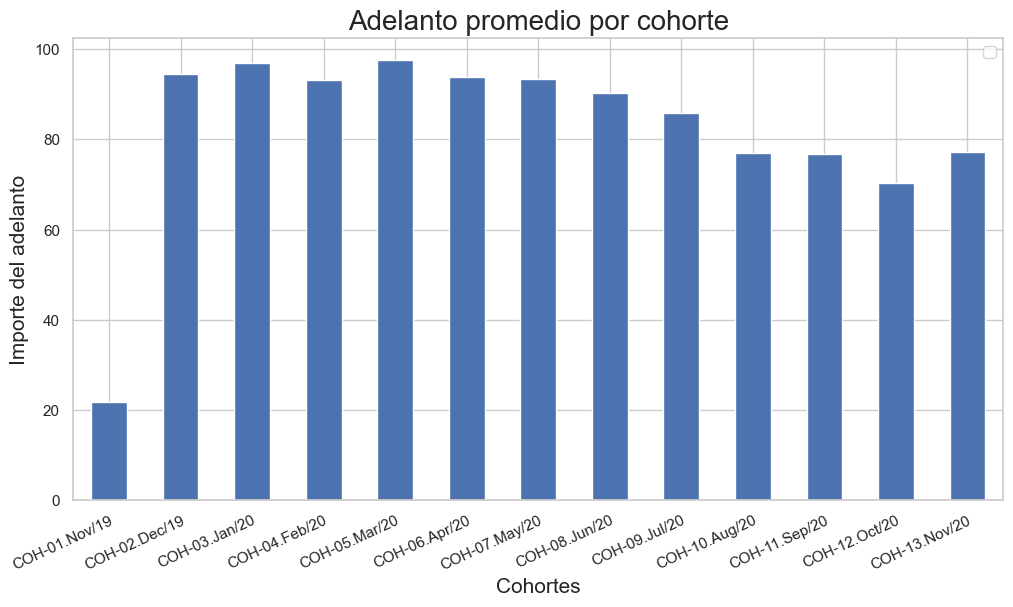

In [2016]:
# Crear gráfico!!!
plt.figure(figsize=(10, 6))
mean_adelanto_by_cohort.plot(kind="bar")
plt.title("Adelanto promedio por cohorte", fontsize=20)
plt.xlabel("Cohortes", fontsize=15)
plt.ylabel("Importe del adelanto", fontsize=15)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
plt.legend([])
plt.show()

#### CONCLUSIONES:

- El valor promedio es muy parecido para todas las cohortes, quizá observándose una tendencia a solicitar importes menores a partir de los meses de verano. No parece demasiado significativa esta información...

### 4.2. Calcular métrica: Proporción de adelantos inmediatos

In [2017]:
# Promedio del adelanto por cohorte
transfer_type_by_cohort = adelantos[subset_adelantos].groupby(['cohorte_lbl','transfer_type'])['cash_request_id'].nunique().reset_index()
transfer_type_by_cohort.set_index(['cohorte_lbl','transfer_type'], inplace=True)
transfer_type_by_cohort.rename(columns={'cash_request_id': 'num_peticiones'}, inplace=True)
transfer_type_by_cohort.head(5)

num_peticiones
cohorte_lbl   transfer_type                
COH-01.Nov/19 instant                     4
              regular                     4
COH-02.Dec/19 instant                   170
              regular                   910
COH-03.Jan/20 instant                    60

#### Gráfica

In [2018]:
# Unstack multi-index para gráfico
transfer_type_by_cohort = transfer_type_by_cohort.unstack()
transfer_type_by_cohort.head(5)

num_peticiones        
transfer_type        instant regular
cohorte_lbl                         
COH-01.Nov/19              4       4
COH-02.Dec/19            170     910
COH-03.Jan/20             60     294
COH-04.Feb/20             84     357
COH-05.Mar/20             80     291

In [2019]:
# Aplanar columnas
transfer_type_by_cohort.columns = [col[1] if isinstance(col, tuple) else col for col in transfer_type_by_cohort.columns]
transfer_type_by_cohort


,instant,regular
cohorte_lbl,,
COH-01.Nov/19,4,4
COH-02.Dec/19,170,910
COH-03.Jan/20,60,294
COH-04.Feb/20,84,357
COH-05.Mar/20,80,291
COH-06.Apr/20,207,745
COH-07.May/20,496,1164
COH-08.Jun/20,1924,3342
COH-09.Jul/20,2016,2131


<Figure size 1000x600 with 0 Axes>

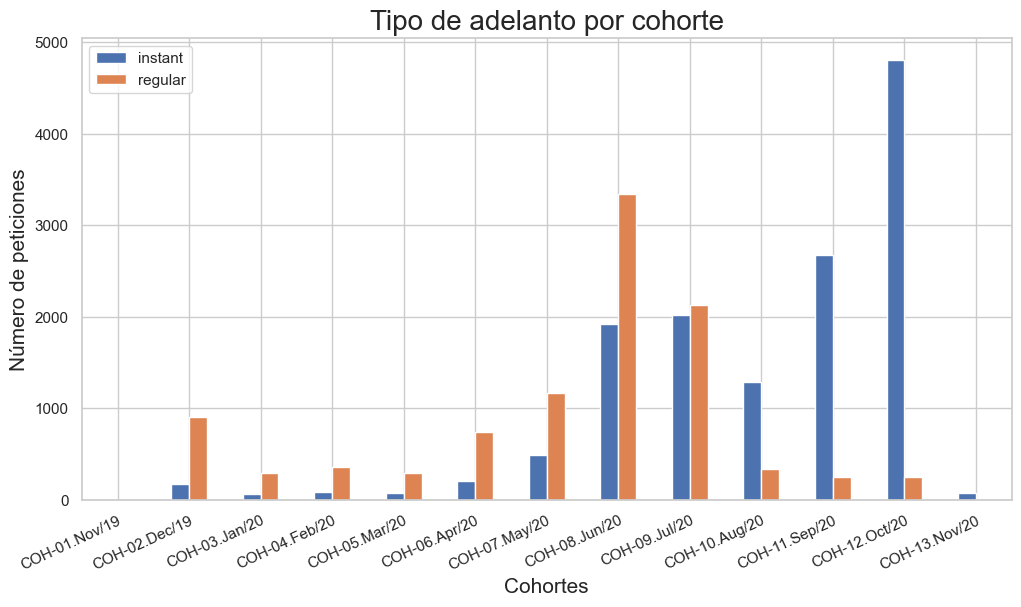

In [2020]:
# Crear gráfico!!!
plt.figure(figsize=(10, 6))
transfer_type_by_cohort.plot(kind="bar")
plt.title("Tipo de adelanto por cohorte", fontsize=20)
plt.xlabel("Cohortes", fontsize=15)
plt.ylabel("Número de peticiones", fontsize=15)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
#plt.legend([])
plt.show()

#### CONCLUSIONES:

- Desde junio, el volumen de peticiones instantáneas va en rápido aumento hasta que, en agosto, supera a la regulares. Puede indicar un cambio en las necesidades monetarias de los usuarios.

- Con el objetivo de mejorar el servicio y facilitar la captación de clientes, podemos pensar en una mejora en la App de solicitud, de modo que la opción seleccionada por defecto en la UI sea 'instant payment' en lugar de 'regular', para ahorrar un clic al usuario.

## CONCLUSIONES FINALES

- Parece que el volumen de usuarios va en aumento a lo largo de los meses, y que los usuarios solicitan el servicio en más de una ocasión, señal de que quedan contentos. Pero los ingresos no son estables a lo largo del tiempo, lo que podría sugerir un comportamiento estacional de los usuarios. Habría que hacer un estudio más profundo sobre esto.

- Claramente el mes de agosto supone un bajón en usuarios y peticiones, y en el volumen de ingresos que éstos representan. Se podrían incentivar las altas con campañas de márketing veraniegas.

- Hay que tener en cuenta que los ingresos van con unos 4-5 meses de retraso con respecto a las peticiones iniciales de servicio, lo cual debe tenerse en cuenta a la hora de diseñar estrategias y esperar resultados. También habría que hacer un estudio más profundo del tipo de incidencias, en particular del decalaje temporal que generan entre los ingresos esperados y los reales.
